In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head(3)
train.tail(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


In [3]:
# 기온 
train.loc[:5:,["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13"              , "Y14","Y15" , "Y16","Y17" , "Y18"            ]]

,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,Y04,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,9.7,12.2,12.3,8.2,10.7,12.5,11.5,11.0,20.0,20.0,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,12.1,12.1,8.3,10.3,12.5,11.0,11.0,20.0,20.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,9.4,12.1,12.1,8.0,9.7,12.0,11.0,11.0,19.5,19.5,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,9.4,12.0,12.1,7.7,9.4,12.0,11.0,11.0,19.5,19.5,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,9.2,12.0,12.0,7.4,9.4,12.0,10.5,10.5,19.0,19.5,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
5,9.1,12.0,12.0,7.3,9.1,12.0,10.5,10.5,19.0,19.0,...,6.0,7.0,6.0,7.5,9.0,9.0,8.5,7.0,8.5,NaN


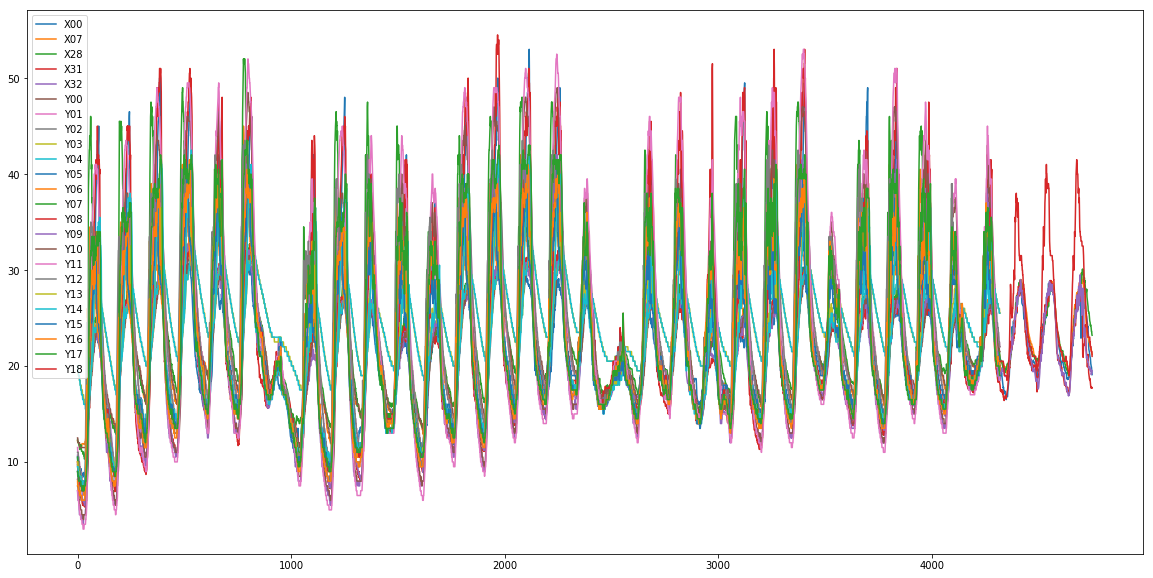

In [4]:
# 기온 
train.loc[:,["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13", "Y14","Y15" , "Y16","Y17" , "Y18"]].plot(figsize=(20,10))

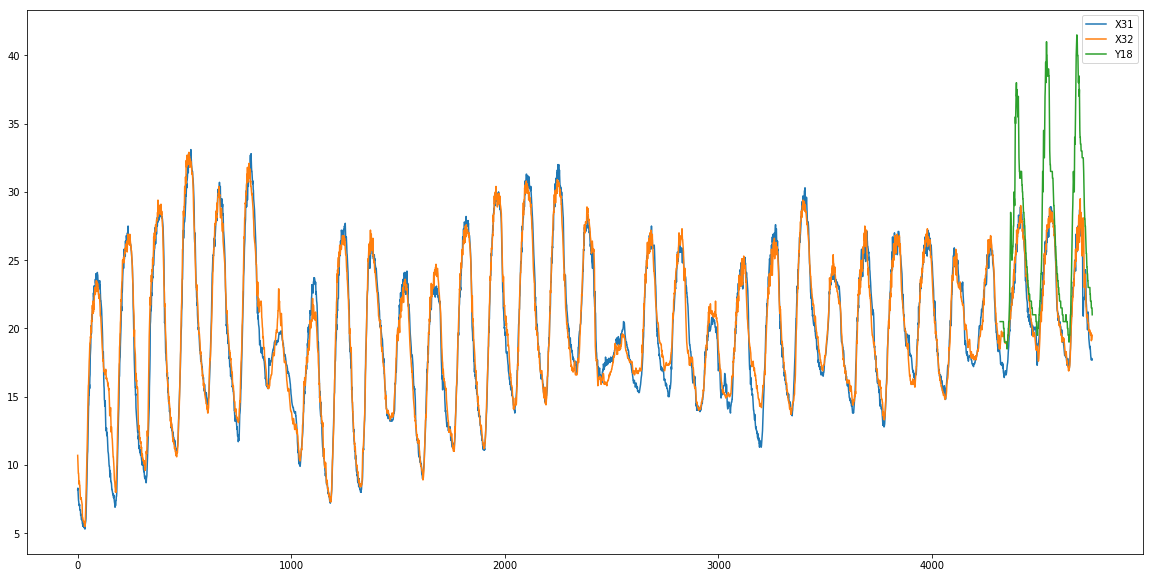

In [5]:
# 기온 
train.loc[:,["X31","X32", "Y18"]].plot(figsize=(20,10))

,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,Y04,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
X00,1.000000,0.957922,0.941699,0.961053,0.963055,0.912809,0.951641,0.954500,0.729502,0.728564,...,0.947931,0.945833,0.933180,0.825280,0.951228,0.911123,0.925800,0.923968,0.911654,0.847230
X07,0.957922,1.000000,0.981081,0.954865,0.962826,0.979172,0.970238,0.973252,0.841002,0.840372,...,0.923403,0.931275,0.911746,0.778135,0.958731,0.931548,0.906402,0.891921,0.885659,0.832904
X28,0.941699,0.981081,1.000000,0.935156,0.938572,0.974490,0.953917,0.958521,0.857562,0.856534,...,0.889321,0.899919,0.879923,0.733078,0.938310,0.916300,0.874344,0.855365,0.849162,0.766648
X31,0.961053,0.954865,0.935156,1.000000,0.979312,0.918779,0.956140,0.957152,0.758773,0.758412,...,0.947002,0.947893,0.932860,0.817218,0.950045,0.915336,0.919587,0.917060,0.905867,0.871901
X32,0.963055,0.962826,0.938572,0.979312,1.000000,0.921823,0.956146,0.960426,0.747431,0.746524,...,0.951074,0.950790,0.936655,0.830264,0.950898,0.906674,0.929539,0.923795,0.911813,0.871631
Y00,0.912809,0.979172,0.974490,0.918779,0.921823,1.000000,0.945462,0.947184,0.920752,0.919972,...,0.850780,0.869858,0.844218,0.663123,0.909656,0.897737,0.826532,0.798885,0.798477,NaN
Y01,0.951641,0.970238,0.953917,0.956140,0.956146,0.945462,1.000000,0.996363,0.807446,0.808103,...,0.954373,0.967733,0.959880,0.786007,0.966648,0.943079,0.920245,0.909008,0.919950,NaN
Y02,0.954500,0.973252,0.958521,0.957152,0.960426,0.947184,0.996363,1.000000,0.804464,0.804596,...,0.955915,0.965284,0.959697,0.796121,0.965006,0.935583,0.927460,0.913493,0.920502,NaN
Y03,0.729502,0.841002,0.857562,0.758773,0.747431,0.920752,0.807446,0.804464,1.000000,0.997148,...,0.638645,0.677301,0.638896,0.403811,0.737742,0.757141,0.606391,0.564290,0.569647,NaN
Y04,0.728564,0.840372,0.856534,0.758412,0.746524,0.919972,0.808103,0.804596,0.997148,1.000000,...,0.638685,0.676703,0.638006,0.403173,0.736848,0.760139,0.604150,0.563474,0.571673,NaN


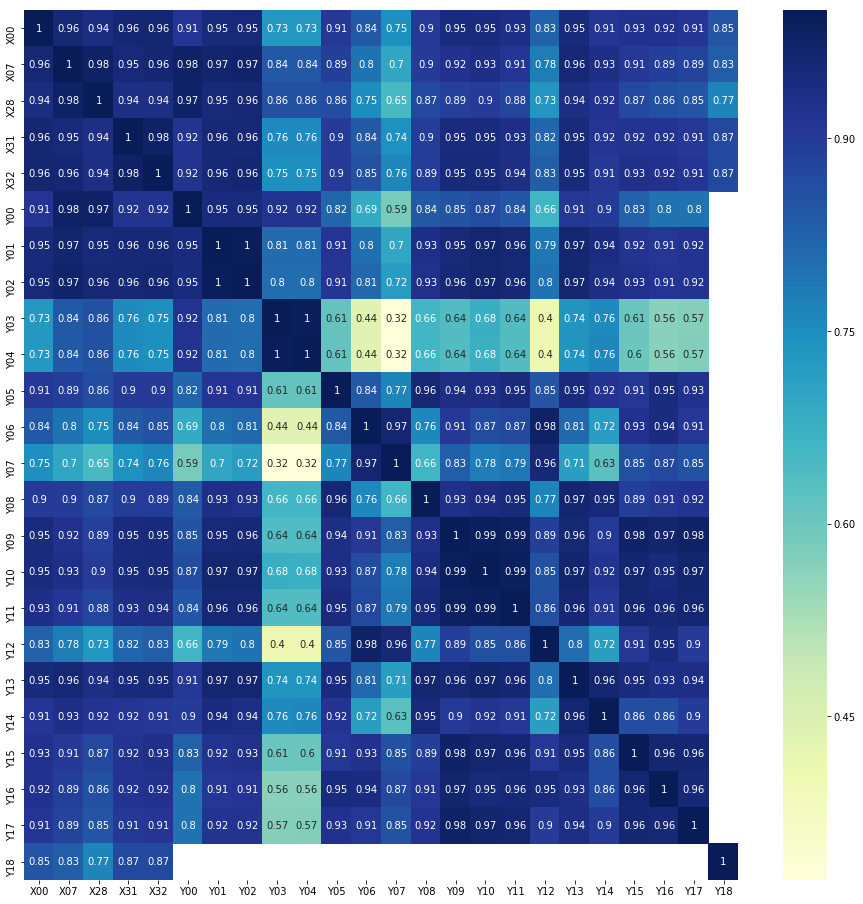

In [6]:
plt.figure(figsize=(16, 16))
corr = train.loc[:,["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13", "Y14","Y15" , "Y16","Y17" , "Y18"]].corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True)
corr

In [7]:
# 평균기온
mean_temp = train.loc[:,["X31", "X32"]].mean(axis=1)
mean_temp

0        9.45
1        9.30
2        8.85
3        8.55
4        8.40
5        8.20
6        7.85
7        7.95
8        7.90
9        7.80
10       7.60
11       7.40
12       7.25
13       7.10
14       6.90
15       6.95
16       6.95
17       6.75
18       6.70
19       6.65
20       6.65
21       6.50
22       6.00
23       5.90
24       5.80
25       5.90
26       5.70
27       5.75
28       5.75
29       5.70
        ...  
4722    22.00
4723    21.70
4724    21.45
4725    21.05
4726    20.90
4727    20.65
4728    20.60
4729    20.40
4730    20.40
4731    20.60
4732    20.80
4733    20.55
4734    20.05
4735    19.55
4736    19.45
4737    19.35
4738    19.35
4739    19.25
4740    19.20
4741    19.15
4742    19.05
4743    18.85
4744    18.85
4745    18.70
4746    18.60
4747    18.40
4748    18.45
4749    18.50
4750    18.50
4751    18.60
Length: 4752, dtype: float64

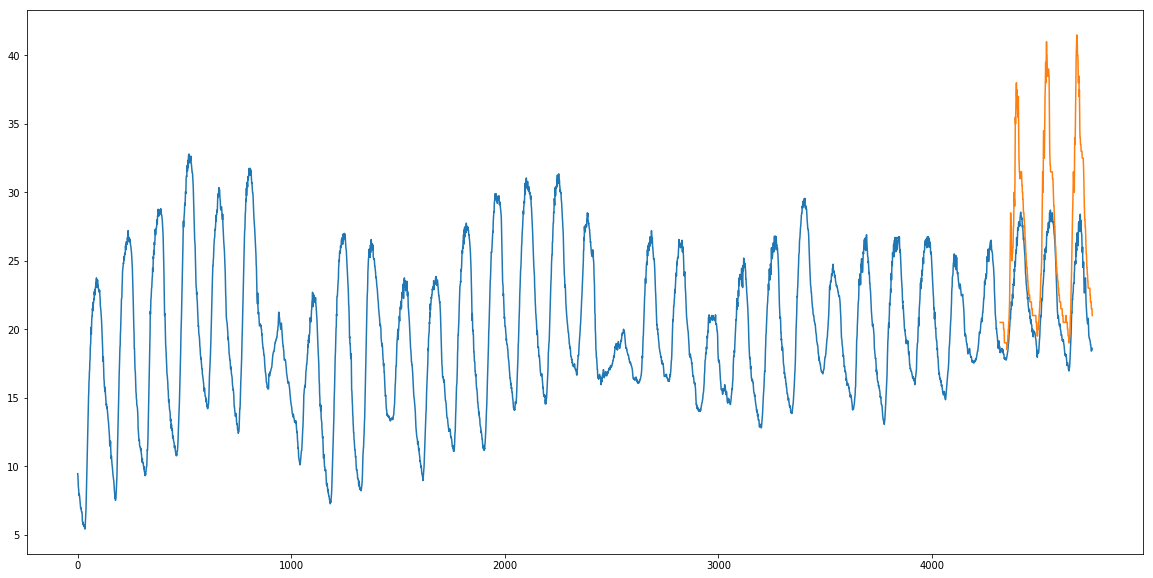

In [8]:
plt.figure(figsize=(20,10))
plt.plot(mean_temp)
plt.plot(train["Y18"])

In [9]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [10]:
t = train["Y18"].isna() 

In [11]:
null_index = t[t==True].index

In [12]:
# 평균기온으로 Y18 매움
train.loc[null_index, "Y18"] = train.loc[null_index, ["X31", "X32"]].mean(axis=1)

In [13]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,9.45
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.30
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,8.85
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,8.55
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.40


In [15]:
# CORR 로 걸로보기
X_train = train.loc[:, "X00":"X39"]
y_train = train["Y18"]

In [16]:
lgb_train = lgb.Dataset(X_train, label=y_train)

lgb_param = {
    "objective":"regression",
    "metrics":"mae",
    "learning_rate":0.01
}

print("cv start")
cv_result = lgb.cv(
    lgb_param,
    lgb_train,
    num_boost_round=99999,
    nfold=5,
    early_stopping_rounds=10,
    stratified=False,
    verbose_eval=10 
)

print("train start")
lgb_model = lgb.train(
    lgb_param,
    lgb_train,
    num_boost_round=len(cv_result["l1-mean"])
)

cv start
[10]	cv_agg's l1: 4.30405 + 0.0691167
[20]	cv_agg's l1: 3.90389 + 0.066239
[30]	cv_agg's l1: 3.54213 + 0.0636612
[40]	cv_agg's l1: 3.21455 + 0.0615559
[50]	cv_agg's l1: 2.91937 + 0.0576726
[60]	cv_agg's l1: 2.65384 + 0.0531185
[70]	cv_agg's l1: 2.4142 + 0.0479431
[80]	cv_agg's l1: 2.19879 + 0.0439675
[90]	cv_agg's l1: 2.00449 + 0.0409546
[100]	cv_agg's l1: 1.82894 + 0.0381864
[110]	cv_agg's l1: 1.67091 + 0.0359337
[120]	cv_agg's l1: 1.5291 + 0.0337966
[130]	cv_agg's l1: 1.40123 + 0.0320412
[140]	cv_agg's l1: 1.28591 + 0.0312166
[150]	cv_agg's l1: 1.18228 + 0.0302362
[160]	cv_agg's l1: 1.08959 + 0.0292875
[170]	cv_agg's l1: 1.00612 + 0.0285885
[180]	cv_agg's l1: 0.93145 + 0.0277609
[190]	cv_agg's l1: 0.864313 + 0.0272384
[200]	cv_agg's l1: 0.804046 + 0.0270629
[210]	cv_agg's l1: 0.749814 + 0.0264537
[220]	cv_agg's l1: 0.700722 + 0.0259172
[230]	cv_agg's l1: 0.656107 + 0.0256483
[240]	cv_agg's l1: 0.615927 + 0.0255232
[250]	cv_agg's l1: 0.579534 + 0.025158
[260]	cv_agg's l1: 0.5

[2050]	cv_agg's l1: 0.238932 + 0.0149357
[2060]	cv_agg's l1: 0.238873 + 0.0149259
[2070]	cv_agg's l1: 0.238824 + 0.0149093
[2080]	cv_agg's l1: 0.238775 + 0.0148931
[2090]	cv_agg's l1: 0.238723 + 0.0148832
[2100]	cv_agg's l1: 0.238673 + 0.0148795
[2110]	cv_agg's l1: 0.238628 + 0.0148666
[2120]	cv_agg's l1: 0.238534 + 0.01487
[2130]	cv_agg's l1: 0.238484 + 0.0148786
[2140]	cv_agg's l1: 0.238425 + 0.0148812
[2150]	cv_agg's l1: 0.23837 + 0.0148948
[2160]	cv_agg's l1: 0.238301 + 0.0148697
[2170]	cv_agg's l1: 0.238258 + 0.0148618
[2180]	cv_agg's l1: 0.238203 + 0.0148466
[2190]	cv_agg's l1: 0.238156 + 0.0148388
[2200]	cv_agg's l1: 0.238104 + 0.0148338
[2210]	cv_agg's l1: 0.23804 + 0.0148557
[2220]	cv_agg's l1: 0.237976 + 0.0148535
[2230]	cv_agg's l1: 0.237932 + 0.0148621
[2240]	cv_agg's l1: 0.237893 + 0.0148514
[2250]	cv_agg's l1: 0.237845 + 0.0148624
[2260]	cv_agg's l1: 0.237786 + 0.0148612
[2270]	cv_agg's l1: 0.237752 + 0.0148462
[2280]	cv_agg's l1: 0.237708 + 0.0148287
[2290]	cv_agg's l1: 

In [17]:
submission["Y18"] = lgb_model.predict(test.loc[:, "X00":"X39"])
submission.head()

,id,Y18
0,4752,20.763100
1,4753,20.484110
2,4754,19.761744
3,4755,19.365410
4,4756,19.931002


In [18]:
submission.to_csv('data/submission_0405_2.csv', index=False)